In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 924.1 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=5ff0abc4a8ff591765fe799c6eec0d06675dcbd8fce095f3991a24a8362b4623
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence_transformers


In [3]:
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]

# model = SentenceTransformer(
#     'sentence-transformers/LaBSE',
#     cache_folder="labse_weights"
# )

# model = SentenceTransformer('labse_weights/sentence-transformers_LaBSE/')
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(sentences)
print(embeddings)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[[ 6.76568896e-02  6.34958893e-02  4.87130918e-02  7.93049783e-02
   3.74480896e-02  2.65278132e-03  3.93749848e-02 -7.09844474e-03
   5.93613870e-02  3.15370262e-02  6.00980632e-02 -5.29051460e-02
   4.06067483e-02 -2.59308480e-02  2.98428405e-02  1.12693186e-03
   7.35149011e-02 -5.03819063e-02 -1.22386612e-01  2.37028431e-02
   2.97264978e-02  4.24768664e-02  2.56338026e-02  1.99519889e-03
  -5.69190718e-02 -2.71598268e-02 -3.29035632e-02  6.60248175e-02
   1.19007103e-01 -4.58791181e-02 -7.26214871e-02 -3.25839967e-02
   5.23413233e-02  4.50552665e-02  8.25300068e-03  3.67024206e-02
  -1.39414985e-02  6.53918535e-02 -2.64272075e-02  2.06393524e-04
  -1.36643425e-02 -3.62810120e-02 -1.95043571e-02 -2.89738216e-02
   3.94270532e-02 -8.84090811e-02  2.62423791e-03  1.36713870e-02
   4.83062938e-02 -3.11566014e-02 -1.17329188e-01 -5.11690415e-02
  -8.85287896e-02 -2.18962654e-02  1.42986672e-02  4.44168001e-02
  -1.34815397e-02  7.43392482e-02  2.66382657e-02 -1.98762305e-02
   1.79191

In [4]:
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

In [5]:
from sklearn.metrics import pairwise
pairwise.PAIRWISE_DISTANCE_FUNCTIONS

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None, *, sum_over_features=True)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None, *, sum_over_features=True)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None, *, sum_over_features=True)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

In [6]:
path = '../input/cndbv13/test1.json'
df = pd.read_json(path, lines=True, chunksize = 450000)
df = next(iter(df))
df.shape

(450000, 20)

In [7]:
idx = df[(~df['abstract'].isna()) & (df['abstract'] != '')].index

In [8]:
df.loc[idx].abstract

40        Drought is the first place in all the natural ...
42        As process variations become a significant pro...
43        360° represents the concerns that are addresse...
48        "2BTextures", a two-movement audio/visual expe...
50        Constructing a system that can cope with a dyn...
                                ...                        
449995    The objective of this paper is to track moving...
449996    Gossiping is to broadcast the message of every...
449997    Within the paper a description of communicatio...
449998    Visualization research focuses either on the t...
449999    Given two datasets A and B, their exclusive cl...
Name: abstract, Length: 313951, dtype: object

In [9]:
text = list(df.loc[idx].abstract.values)
text[:10]

['Drought is the first place in all the natural disasters in the world. It is especially serious in North China Plain. In this paper, different soil water content control levels at winter wheat growth stages are performed on Gucheng Ecological-Meteorological Integrated Observation Experiment Station of CAMS, China. Some canopy parameters, including growth conditions, dry weight, physiological parameters and hyperspectral reflectance, are measured from erecting stage to milk stage for winter wheat in 2009. The relationship between canopy parameters and soil relative moisture, canopy water content and water indices of winter wheat are established. The results show that some parameters, such as SPAD and dry weight of leaves, decrease with the increasing of soil relative moisture, while other parameters, including dry weight of caudexes, above ground dry weight, height, photosynthesis rate, intercellular CO 2 concentration, stomatal conductance and transpiration rate, increase correspondin

In [10]:
len(text)

313951

In [11]:
corpus_embeddings = model.encode(text, batch_size=128, show_progress_bar=True, convert_to_tensor=True)

Batches:   0%|          | 0/2453 [00:00<?, ?it/s]

In [12]:
corpus_embeddings.shape

torch.Size([313951, 384])

In [13]:
df.loc[idx].shape

(313951, 20)

In [14]:
# import pickle

# with open('/kaggle/working/corpus_embeddings.pickle', 'wb') as handle:
#     pickle.dump(corpus_embeddings, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [15]:
# import time 

# print("Start clustering")
# start_time = time.time()

In [16]:
# from sentence_transformers import util

# clusters = util.community_detection(corpus_embeddings, min_community_size=25, threshold=0.65)

In [17]:
# print("Clustering done after {:.2f} sec".format(time.time() - start_time))

In [18]:
# #Print for all clusters the top 3 and bottom 3 elements
# for i, cluster in enumerate(clusters):
#     print("\nCluster {}, #{} Elements ".format(i+1, len(cluster)))
#     for sentence_id in cluster[0:3]:
#         print("\t", text[sentence_id])
#     print("\t", "...")
#     for sentence_id in cluster[-3:]:
#         print("\t", text[sentence_id])

In [19]:
# len(clusters)

In [20]:
# clusters[0][:5]

In [21]:
# len(text)

In [22]:
len(df.loc[idx])

313951

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100


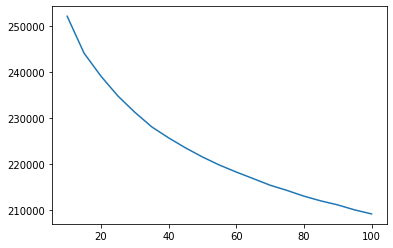

In [24]:
wcss = []

# for i in [10, 15, 20, 25]:
for i in list(range(10, 105, 5)):
    print(i)
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(corpus_embeddings.cpu())
    wcss.append(clustering.inertia_)
    
ks = list(range(10, 105, 5))
sns.lineplot(x = ks, y = wcss);

In [ ]:
clustering = KMeans(n_clusters=20, init='k-means++', random_state=42)
clustering.fit(corpus_embeddings.cpu())

In [ ]:
corpus_embeddings.cpu().shape[0]

In [ ]:
labels = clustering.labels_

In [ ]:
from collections import Counter

Counter(sorted(labels))

In [48]:
len(labels)

313951

In [49]:
labels

array([23, 22, 24, ..., 17, 14, 12], dtype=int32)

In [50]:
df.loc[idx].shape

(313951, 20)

In [52]:
len(idx)

313951

In [56]:
idx_labels = dict(zip(idx, labels))

In [57]:
import pickle

with open('/kaggle/working/idx_labels.pickle', 'wb') as handle:
    pickle.dump(idx_labels, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [2]:
import pickle

In [3]:
with open('/kaggle/working/idx_labels.pickle', 'rb') as f:
    x = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/idx_labels.pickle'